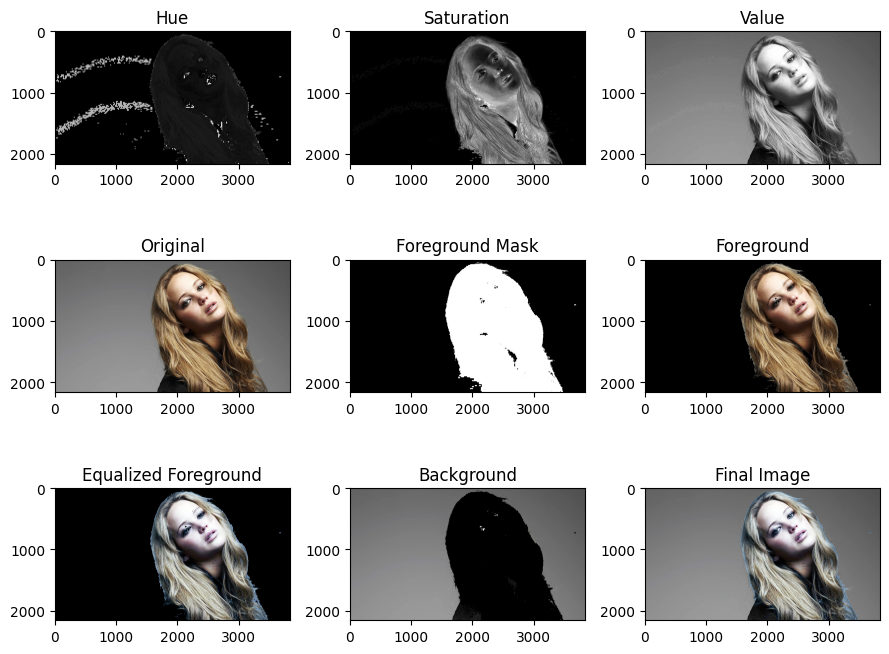

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('jeniffer.jpg', 1)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

fig , ax = plt.subplots(3,3, figsize=(9,7))

ax[0,0].imshow(h, cmap='gray')
ax[0,0].set_title('Hue')
ax[0,1].imshow(s, cmap='gray')
ax[0,1].set_title('Saturation')
ax[0,2].imshow(v, cmap='gray')
ax[0,2].set_title('Value')

ax[1,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Original')

threshold = 12
ret, foreground_mask = cv.threshold(s, threshold, 255, cv.THRESH_BINARY)
foreground = cv.bitwise_and(img, img, mask=foreground_mask)
hist = cv.calcHist([cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)], [0], foreground_mask, [256], [0, 256])
cumulative_hist = np.cumsum(hist)
b ,g ,r = cv.split(foreground)
equalized_b = cv.equalizeHist(b)
equalized_g = cv.equalizeHist(g)
equalized_r = cv.equalizeHist(r)
equalized_foreground = cv.merge((equalized_b, equalized_g, equalized_r))
inverse_mask = cv.bitwise_not(foreground_mask)
background = cv.bitwise_and(img, img, mask=inverse_mask)
final_image = cv.add(background, equalized_foreground)

ax[1,1].imshow(foreground_mask, cmap='gray')
ax[1,1].set_title('Foreground Mask')

ax[1,2].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[1,2].set_title('Foreground')

ax[2,0].imshow(cv.cvtColor(equalized_foreground, cv.COLOR_BGR2RGB))
ax[2,0].set_title('Equalized Foreground')

ax[2,1].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[2,1].set_title('Background')

ax[2,2].imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
ax[2,2].set_title('Final Image')





plt.tight_layout()
plt.show()
